## CLUSTER ANALYSIS - CUSTOMER SEGMENTATION DATA

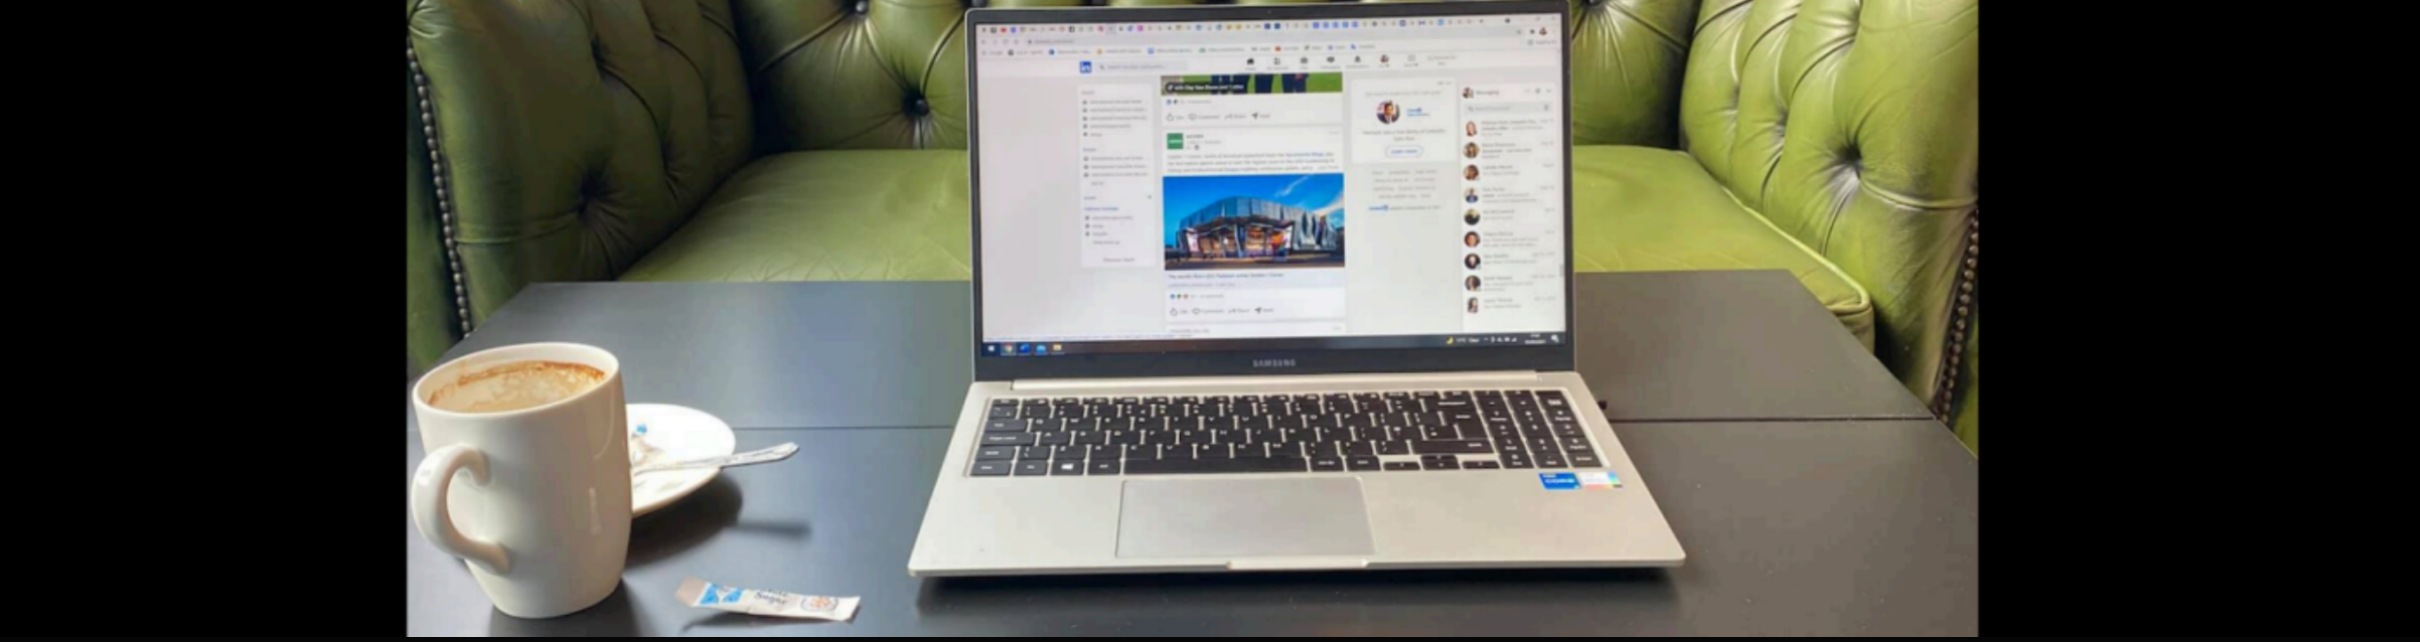

### HEMANT THAPA

### 1. LOADING LIBRARIES 

In [1]:
import math as mt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import statistics as st
import missingno as msno
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter 
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("error")
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [4]:
#cutomer dataset
df = pd.read_csv('segmentation data.csv')

In [5]:
#printing first five rows
df[:5]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### Customer Segmentation Report
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical 'FMCG' store.

 All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed, and there are no missing values. In addition, the volume of the dataset has been restricted and anonymized to protect the privacy of the customers.


## Segmentation Data - Legend

The dataset contains the following variables:

| Variable Name    | Data Type   | Range     | Description |
|------------------|-------------|-----------|-------------|
| ID               | Numerical   | Integer   | Shows a unique identifier of a customer. |
| Sex              | Categorical | {0, 1}    | Biological sex (gender) of a customer. In this dataset, there are only two different options: 0 for male and 1 for female. |
| Marital Status   | Categorical | {0, 1}    | Marital status of a customer. 0 represents "single," while 1 represents "non-single" (divorced, separated, married, or widowed). |
| Age              | Numerical   | Integer   | The age of the customer in years, calculated as the current year minus the year of birth of the customer at the time of the creation of the dataset. The minimum observed age is 18, and the maximum observed age is 76. |
| Education        | Categorical | {0, 1, 2, 3} | Level of education of the customer. The options are: 0 for "other/unknown," 1 for "high school," 2 for "university," and 3 for "graduate school." |
| Income           | Numerical   | Real      | Self-reported annual income in US dollars of the customer. The minimum observed income is 35,832, and the maximum observed income is 309,364. |
| Occupation       | Categorical | {0, 1, 2} | Category of occupation of the customer. The categories are: 0 for "unemployed/unskilled," 1 for "skilled employee/official," and 2 for "management/self-employed/highly qualified employee/officer." |
| Settlement Size  | Categorical | {0, 1, 2} | The size of the city that the customer lives in. The options are: 0 for "small city," 1 for "mid-sized city," and 2 for "big city." |


### 3. PRE PROCESSING 

In [6]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### we have total eight numerical columns, where our data types is int 64. 

In [7]:
#calculating the missing values percentage for each columns
def missing_columns_percentages(df):
    #empty list to store missing percentage
    missing_percentages = {}
    #for loop to iterate each columns
    for i in df.columns:
        #calculating missing values of each columns
        missing_count = df[i].isnull().sum()
        #calculating the length of each columns
        total_count = len(df[i])
        #calcualting the missing percentage of each columns
        missing_percentage = (missing_count / total_count) * 100
        #storing values into empty list
        missing_percentages[i] = missing_percentage
        print(f"Missing Percentage for '{i}': {missing_percentage:.2f}%")

In [8]:
#checking missing percentage with respect to columns
missing_percentages = missing_columns_percentages(df)

Missing Percentage for 'ID': 0.00%
Missing Percentage for 'Sex': 0.00%
Missing Percentage for 'Marital status': 0.00%
Missing Percentage for 'Age': 0.00%
Missing Percentage for 'Education': 0.00%
Missing Percentage for 'Income': 0.00%
Missing Percentage for 'Occupation': 0.00%
Missing Percentage for 'Settlement size': 0.00%


##### We have no have any missing values in our dataset. 

In [9]:
#removing id columns
df.drop(columns=['ID'], inplace=True)

In [10]:
df[:10]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
6,0,0,53,1,156495,1,1
7,0,0,35,1,193621,2,1
8,0,1,61,2,151591,0,0
9,0,1,28,1,174646,2,0


### 4. EXPLORATORY DATA ANALYSIS

### 4.1 How many Male and Female customers are there?

In [11]:
df['Sex'].value_counts()

Sex
0    1086
1     914
Name: count, dtype: int64

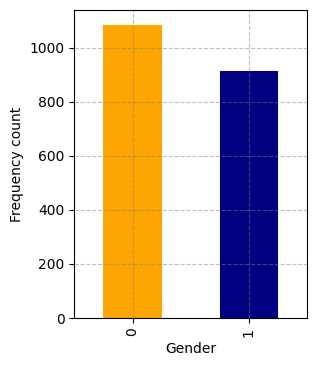

In [12]:
plt.figure(figsize=(3, 4))
colors = ['orange', 'navy']
df['Sex'].value_counts().plot(kind='bar', color=colors)
plt.grid(True, ls='--', alpha=0.5, c='grey')
plt.ylabel('Frequency count')
plt.xlabel('Gender')
plt.show()

##### **We have nearly, 1086 male in our dataset and 914 female in our dataset.**

### 4.2 How is the distribution of education levels among customers?


In [13]:
df['Education'].value_counts()

Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64

In [14]:
colors = ['orange', 'navy', 'royalblue', 'blue']

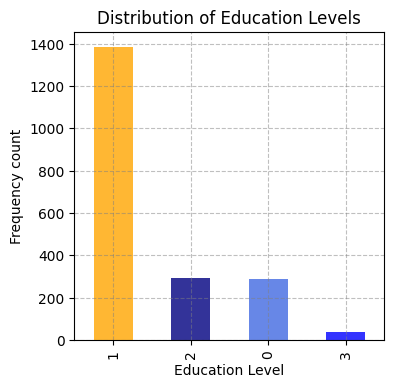

In [15]:
plt.figure(figsize=(4, 4))
df['Education'].value_counts().plot(kind='bar', color=colors, alpha=0.8)
plt.xlabel('Education Level')
plt.ylabel('Frequency count')
plt.title('Distribution of Education Levels')
plt.grid(True, ls='--', alpha=0.5, c='grey')
plt.show()

##### This report presents an analysis of educational levels based on a dataset containing education information. 

The dataset contains the following categories of education levels:

- 0: Other/Unknown
- 1: High School
- 2: University
- 3: Graduate School

The data has been collected from a sample of individuals and the frequencies of each education level are as follows:

- Other/Unknown: 287 individuals
- High School: 1386 individuals
- University: 291 individuals
- Graduate School: 36 individuals

#### Education Level Distribution

- **Other/Unknown (0):** This category represents individuals for whom the education level is either not known or classified as "Other." There are 287 such cases in the dataset.

- **High School (1):** The majority of individuals fall into this category, with 1386 individuals having completed their high school education.

- **University (2):** A significant portion of the dataset (291 individuals) has achieved a university education.

- **Graduate School (3):** A relatively smaller number of individuals (36 individuals) have attained graduate-level education.


### 4.3 How is the distribution of marital status among customers?


In [16]:
df['Marital status'].value_counts()

Marital status
0    1007
1     993
Name: count, dtype: int64

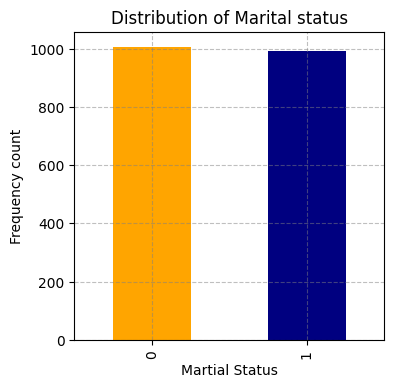

In [17]:
plt.figure(figsize=(4, 4))
colors = ['orange', 'navy']
df['Marital status'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Martial Status')
plt.ylabel('Frequency count')
plt.title('Distribution of Marital status')
plt.grid(True, ls='--', alpha=0.5, c='grey')
plt.show()

### 4.4 How is the distribution of occupations among customers?


In [18]:
colors = ['orange', 'navy', 'royalblue']

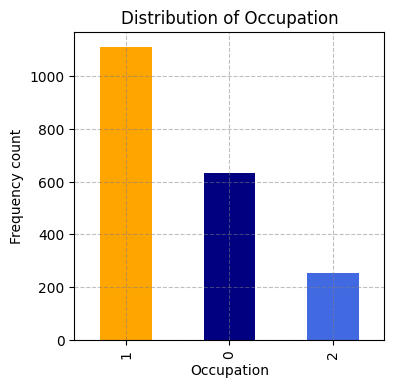

In [19]:
plt.figure(figsize=(4, 4))
df['Occupation'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Occupation')
plt.ylabel('Frequency count')
plt.title('Distribution of Occupation')
plt.grid(True, ls='--', alpha=0.5, c='grey')
plt.show()

In [20]:
df['Occupation'].value_counts()

Occupation
1    1113
0     633
2     254
Name: count, dtype: int64

#### Occupation Distribution

The dataset contains information about the occupation of customers, categorized into three groups:

- **0: Unemployed/Unskilled**
- **1: Skilled Employee/Official**
- **2: Management/Self-Employed/Highly Qualified Employee/Officer**

The distribution of customers among these occupation categories is as follows:

- **Unemployed/Unskilled (0):** There are 633 customers in this category.

- **Skilled Employee/Official (1):** The majority of customers, 1113 in total, belong to this category.

- **Management/Self-Employed/Highly Qualified Employee/Officer (2):** This category contains 254 customers.


### 4.5 What is the distribution of customer city sizes?


In [21]:
colors = ['orange', 'navy', 'royalblue']

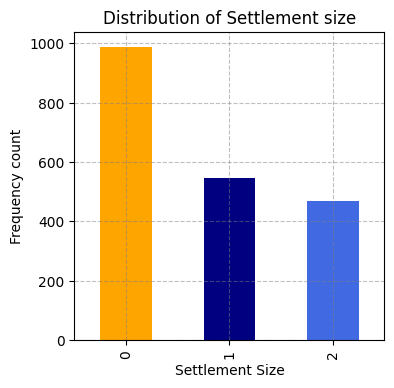

In [22]:
plt.figure(figsize=(4, 4))
df['Settlement size'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Settlement Size')
plt.ylabel('Frequency count')
plt.title('Distribution of Settlement size')
plt.grid(True, ls='--', alpha=0.5, c='grey')
plt.show()

In [23]:
df['Settlement size'].value_counts()

Settlement size
0    989
1    544
2    467
Name: count, dtype: int64

#### Customer City Size Distribution

The dataset includes information about the size of the city where customers reside, categorized into three groups:

- **0: Small City**
- **1: Mid-Sized City**
- **2: Big City**

The distribution of customers among these city size categories is as follows:

- **Small City (0):** 989 customers reside in small cities.

- **Mid-Sized City (1):** 544 customers live in mid-sized cities.

- **Big City (2):** 467 customers are from big cities.

### 4.6 What is the average income for each gender in the dataset?

In [24]:
#calculating the average income for each gender
average_income_by_gender = df.groupby('Sex')['Income'].mean()
print(average_income_by_gender)

Sex
0    127775.225599
1    112850.047046
Name: Income, dtype: float64


we've performed an analysis based on the available data. The dataset includes two gender categories:

- **0: Male**
- **1: Female**

After calculating the average income for each gender using the `groupby` method, we obtained the following results:

- **Male (0):** The average income for males is $127,775.23.

- **Female (1):** The average income for females is $112,850.05.

### 4.7 Which occupation in the dataset has the highest average income?

In [25]:
#calculating the average income for each occupation
average_income_by_occupation = df.groupby('Occupation')['Income'].mean()

In [26]:
#occupation with the highest average income
highest_earning_occupation = average_income_by_occupation.idxmax()

In [27]:
#print the result
print(average_income_by_occupation)
print(f"The occupation with the highest average income is Occupation {highest_earning_occupation}")

Occupation
0     90837.232227
1    125474.473495
2    176203.862205
Name: Income, dtype: float64
The occupation with the highest average income is Occupation 2


- **Occupation 0:** The average income for customers in this occupation is approximately $90,837.23.

- **Occupation 1:** Customers in this occupation have an average income of around $125,474.47.

- **Occupation 2:** The highest average income is found in this occupation, with an approximate income of $176,203.86.

The occupation with the highest average income is **Occupation 2**, where customers have an average income of approximately $176,203.86. This insight is crucial for understanding income disparities between different occupations within the dataset.

### 4.8 Which settlement size category in the dataset has the highest average income?


In [28]:
#calculating the average income for each settlement size
average_income_by_settlement = df.groupby('Settlement size')['Income'].mean()
#settlement size category with the highest average income
highest_income_settlement = average_income_by_settlement.idxmax()
print(average_income_by_settlement)
print(f"The settlement size category with the highest average income is Settlement Size {highest_income_settlement}")

Settlement size
0    101061.787664
1    137430.343750
2    143889.985011
Name: Income, dtype: float64
The settlement size category with the highest average income is Settlement Size 2


we conducted an analysis based on the available data:

- **0: Small City**
- **1: Mid-Sized City**
- **2: Big City**

After calculating the average income for each settlement size using the `groupby` method, we obtained the following results:

- **Small City (0):** Customers in small cities have an average income of approximately $101,061.79.

- **Mid-Sized City (1):** The average income for customers in mid-sized cities is around $137,430.34.

- **Big City (2):** The highest average income is found among customers in big cities, with an average income of approximately $143,889.99.

The settlement size category with the highest average income is **Settlement Size 2**, where customers in big cities have an average income of approximately $143,889.99. This information is crucial for understanding income disparities based on settlement size within the dataset.


### 4.9 Among married and single individuals, which marital status has the highest average income?


In [29]:
#calculating the average income for each marital status
average_income_by_marital_status = df.groupby('Marital status')['Income'].mean()
#marital status with the highest average income
highest_earning_marital_status = average_income_by_marital_status.idxmax()
print(average_income_by_marital_status)
print(f"The marital status with the highest average income is {highest_earning_marital_status}")

Marital status
0    123736.232373
1    118133.385700
Name: Income, dtype: float64
The marital status with the highest average income is 0


##### To gain insights into the income disparities between single and non-single individuals in the dataset, we analyzed the data and found the following results:

- **Marital Status 0 (Single):** The average income for single individuals is approximately $123,736.23.

- **Marital Status 1 (Non-Single):** Non-single individuals, including those who are divorced, separated, married, or widowed, have an average income of around $118,133.39.

Among single and non-single individuals, the **marital status with the highest average income is Marital Status 0 (Single)**, with an average income of approximately $123,736.23. This analysis provides valuable information about income differences between the two marital status categories within the dataset.


### 5. FEATURE SELECTION

In [30]:
#selecting Income and age
X = df[['Income', 'Age']]

In [31]:
X[:5]

,Income,Age
0,124670,67
1,150773,22
2,89210,49
3,171565,45
4,149031,53


### 5.1 Calculating Centroids

In [32]:
from sklearn.cluster import KMeans

In [33]:
#define the number of clusters (k)
k = 5

The Euclidean distance between each data point $X$ and centroid $C_i$ is calculated as:

$$ \text{Euclidean Distance} = \sqrt{\sum_{j=1}^{n} (X_j - C_{ij})^2} $$

Where $n$ is the number of dimensions, $X_j$ represents the $j$-th coordinate of the data point $X$, and $C_{ij}$ represents the $j$-th coordinate of centroid $C_i$.


In [34]:
#define a function for k-means clustering
def kmeans(X, k, max_iters=100):
    #cluster centroids randomly
    centroids = X.sample(k)
    
    for _ in range(max_iters):
        #Euclidean distance between each data point & centroids
        distances = np.sqrt(((X - centroids.iloc[0]) ** 2).sum(axis=1))
        labels = [0] * len(X)
        
        for i in range(1, k):
            #distances to other centroids
            new_distances = np.sqrt(((X - centroids.iloc[i]) ** 2).sum(axis=1))
            for j in range(len(X)):
                #checking if a closer centroid is found
                if new_distances[j] < distances[j]:
                    labels[j] = i
                    distances[j] = new_distances[j]

        #update centroids as the mean of the data points assigned to each cluster
        new_centroids = pd.DataFrame([X[np.array(labels) == i].mean() for i in range(k)])
        #checking for convergence by comparing old and new centroids
        if centroids.equals(new_centroids):
            break
        centroids = new_centroids
    #return the final cluster centroids and labels
    return centroids, labels

In [35]:
#kmeans function to perform clustering
cluster_centroids, cluster_labels = kmeans(X, k=5, max_iters=100)

In [36]:
cluster_centroids.sort_values(by="Income")

,Income,Age
2,74030.405028,32.483240
3,105255.950355,32.134752
0,130855.704225,38.496479
4,166694.260274,41.886986
1,236360.311688,44.636364


### 5.2 Validating Centroids Using Kmean Model 

In [37]:
#KMeans model
kmeans = KMeans(n_clusters=5)
#fitting the KMeans model 
kmeans.fit(X)

KMeans(n_clusters=5)

In [38]:
#entroids (cluster centers)
centroids = kmeans.cluster_centers_

In [39]:
# Sort centroids by the first column (ascending order)
sorted_indices = centroids[:, 0].argsort()
sorted_centroids = centroids[sorted_indices]

for i, sorted_centroid in enumerate(sorted_centroids):
    formatted_centroid = [f"{value:.2f}" for value in sorted_centroid]
    print(f"Cluster Centroid :", formatted_centroid)

Cluster Centroid : ['74376.44', '32.46']
Cluster Centroid : ['105869.55', '32.31']
Cluster Centroid : ['131912.22', '38.65']
Cluster Centroid : ['168190.93', '41.97']
Cluster Centroid : ['238230.37', '44.51']


### 5.3 K-means Inertia (Within-Cluster Sum of Squares)

K-means inertia is a measure used to assess the quality of a K-means clustering solution. It quantifies how close the data points within a cluster are to the centroid of that cluster. In other words, it measures the "tightness" of the clusters.

The formula for calculating K-means inertia (WCSS) is as follows:

$$
WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$


- $WCSS$ is the within-cluster sum of squares, which is the value we are trying to calculate.
- $k$ is the number of clusters you are using in the K-means algorithm.
- $C_i$ represents the set of data points that belong to cluster $i$.
- $x$ is a data point within cluster $C_i$.
- $\mu_i$ is the centroid (mean) of cluster $i$.

The formula sums up the squared Euclidean distances between each data point in a cluster ($x$) and the centroid ($\mu_i$) of that cluster. The outer summation ($\sum_{i=1}^{k}$) goes through all the clusters, and the inner summation ($\sum_{x \in C_i}$) goes through all data points in each cluster.

The goal in K-means clustering is to minimize the WCSS. As you increase the number of clusters (k), the WCSS tends to decrease, but we don't want to create too many clusters, as that can lead to overfitting. So, typically, we choose the number of clusters that minimizes WCSS while maintaining the desired level of granularity in your clustering solution. we can use techniques like the elbow method to determine the optimal number of clusters based on the trade-off between WCSS and the number of clusters.


In [40]:
n_clusters_values = [ x for x in range(1,6)]

In [41]:
n_clusters_values

[1, 2, 3, 4, 5]

In [42]:
inertias = []

In [43]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
for n in n_clusters_values:
    kmeans = KMeans(n_clusters=n) 
    kmeans.fit(X)  
    inertias.append(kmeans.inertia_)

In [44]:
inertias

[2903113028798.316,
 1214580023983.0767,
 673029949726.7307,
 377137074591.49524,
 248987937927.16388]

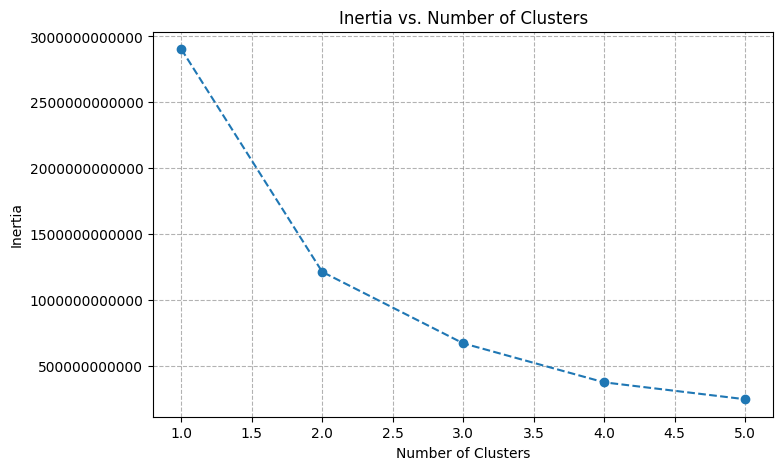

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_values, inertias, marker='o', ls='--')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.show()

##### Now, we have made a plot through Kmeans, which is inertia vs number of clusters. while taking k values equal to 5, gives us a good elbow shape plot.

### 5.4 Silthouette Score

In [46]:
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import silhouette_score

In [47]:
inertias = []
mean_distortions=[]

for n in n_clusters_values:
    kmeans = KMeans(n_clusters=n) 
    kmeans.fit(X)  
    inertias.append(kmeans.inertia_)
    predictions = kmeans.predict(X)
    distortion=sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mean_distortions.append(distortion)
    print('Number of Clusters:', n, '\tAverage Distortion:', distortion)

Number of Clusters: 1 	Average Distortion: 27959.477583656284
Number of Clusters: 2 	Average Distortion: 18797.269281525416
Number of Clusters: 3 	Average Distortion: 14332.610129545472
Number of Clusters: 4 	Average Distortion: 10873.293281060463
Number of Clusters: 5 	Average Distortion: 8671.452499229095


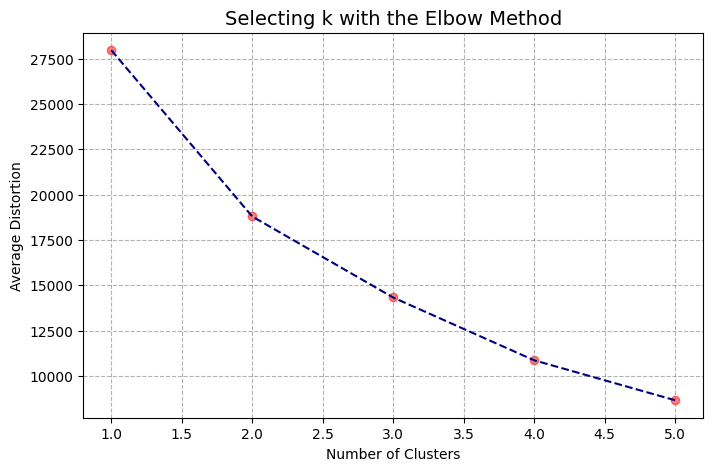

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_values, mean_distortions, color='navy', ls='--')
plt.scatter(n_clusters_values, mean_distortions, color='red', alpha=0.5, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.show()

In [49]:
n_clusters = range(2, 6)
silhouette_scores = []

In [50]:
for n in n_clusters:
    model = KMeans(n_clusters=n)
    preds = model.fit_predict(X)
    score = silhouette_score(X, preds)
    silhouette_scores.append((n, score))

#silhouette scores along with the number of clusters
for n, score in silhouette_scores:
    print(f"Number of Clusters: {n}, Silhouette Score: {score}")

Number of Clusters: 2, Silhouette Score: 0.5834469068936822
Number of Clusters: 3, Silhouette Score: 0.5123353835208848
Number of Clusters: 4, Silhouette Score: 0.5429689557678162
Number of Clusters: 5, Silhouette Score: 0.5401417830595219


#### While performing silhouette score, it can be said cluster 4 & 5 cam be good match for grouping.

### 6. PLOTTING KMEAN CLUSTER

In [51]:
def plot_kmeans_cluster(X, df, k):
    #K-Means clustering for the specified value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['cluster'] = kmeans.fit_predict(X)
    #scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='cluster', data=df, palette='rocket', s=100, alpha=0.7)
    
    #cluster centroids
    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    #labels for cluster centroids
    for i, center in enumerate(cluster_centers):
        plt.plot([center[0], center[0]], [center[1], center[1]], c='red', ls='--', lw=1)
        plt.text(center[0] + 5, center[1] - 5, f'Cluster {i}', fontsize=12, ha='left', va='top', color='red')
    
    plt.title(f'K-Means Clustering (k = {k})', fontsize=12)
    plt.xlabel(X.columns[0], fontsize=10)
    plt.ylabel(X.columns[1], fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, ls='--', color='grey', alpha=0.5, lw=1)
    plt.xticks(rotation=60)
    plt.legend()
    plt.suptitle(f'Customer Segmentation with K-Means Clustering (k = {k})', fontsize=10)
    plt.tight_layout()
    plt.show()

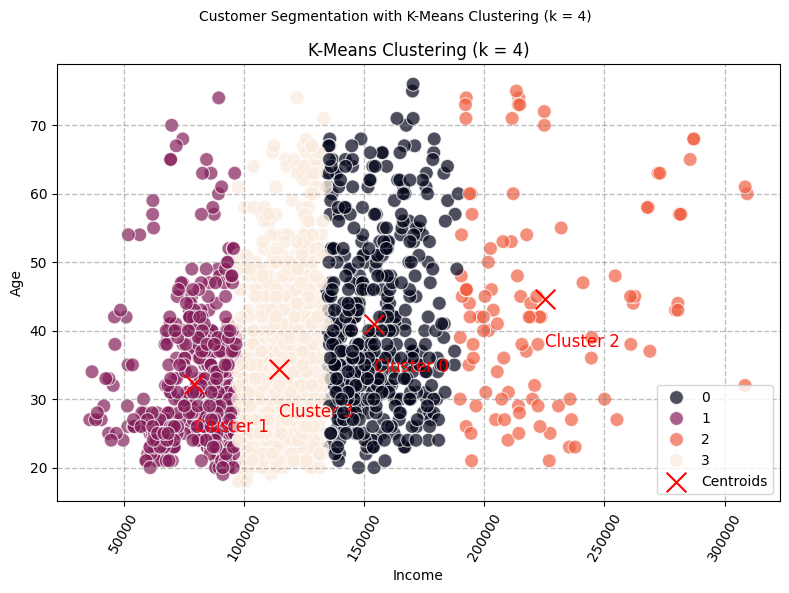

In [52]:
plot_kmeans_cluster(X, df, k=4)

Now, we have plotted four cluster group using k value equal to 4. It has distributed our Age and Income into four group. group one regresent low income

In [53]:
def plot_kmeans_cluster_centroids(X, df, k):
    #K-Means clustering for the specified value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['cluster'] = kmeans.fit_predict(X)
    #scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='cluster', data=df, palette='rocket', s=100)
    #cluster centroids
    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    #labels for cluster centroids
    for i, center in enumerate(cluster_centers):
        plt.plot([center[0], center[0]], [center[1], center[1]], c='red', ls='--', lw=1)
        plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, ha='left', va='top')
    #lines connecting centroids to x and y axes
    for i, center in enumerate(cluster_centers):
        plt.plot([center[0], center[0]], [center[1], 0], c='red', ls='--', lw=1)
        plt.plot([center[0], 0], [center[1], center[1]], c='red', ls='--', lw=1)
    plt.title(f'K-Means Clustering (k = {k})', fontsize=12)
    plt.xlabel(X.columns[0], fontsize=10)
    plt.ylabel(X.columns[1], fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, ls='--', color='grey', alpha=0.5, lw=1)
    plt.xticks(rotation=60)
    plt.legend()
    plt.suptitle(f'Customer Segmentation with K-Means Clustering (k = {k})', fontsize=10)
    plt.tight_layout()
    plt.show()

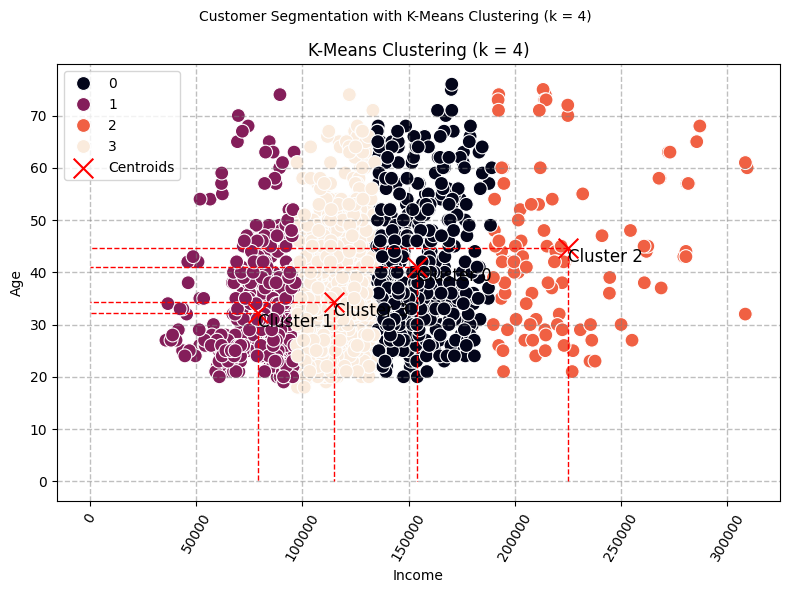

In [54]:
plot_kmeans_cluster_centroids(X, df, k=4)

### 7. REGRESSION ANALYSIS

### 7.1 Correlation between Age & Income

In [55]:
df[:5]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


### 7.2 Feature Selection

In [56]:
#Independent variable
X = df['Income'].values.reshape(-1,1)

In [57]:
X = (X - X.mean()) / X.std()

In [58]:
X[:5]

array([[ 0.09752361],
       [ 0.78265438],
       [-0.83320224],
       [ 1.32838624],
       [ 0.73693175]])

In [59]:
#dependent variables
y = df['Age'].values

In [60]:
y[:5]

array([67, 22, 49, 45, 53], dtype=int64)

### 7.3 Splitting data into test & train

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#70 precent for train and 30 percent for test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0) 

### 8 Deep learning model 

linear regression, using activation functions in hidden layers may not provide significant benefits since the goal is to model a linear relationship between the input features and the target variable. Linear combinations of linear functions remain linear.

In [63]:
model = tf.keras.Sequential([
    # Input layer: Specify the input shape based on the number of features
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [64]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [65]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=3, validation_data=(X_test, y_test))

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

#### 8.1 Predictions 

In [66]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

50/50 [==============================] - 0s 937us/step


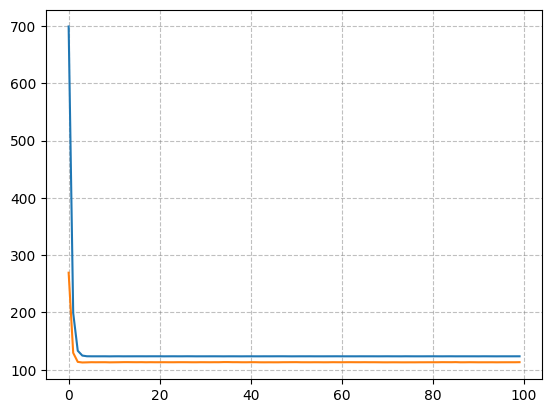

In [67]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True, linestyle="--", color="grey", alpha=0.5)

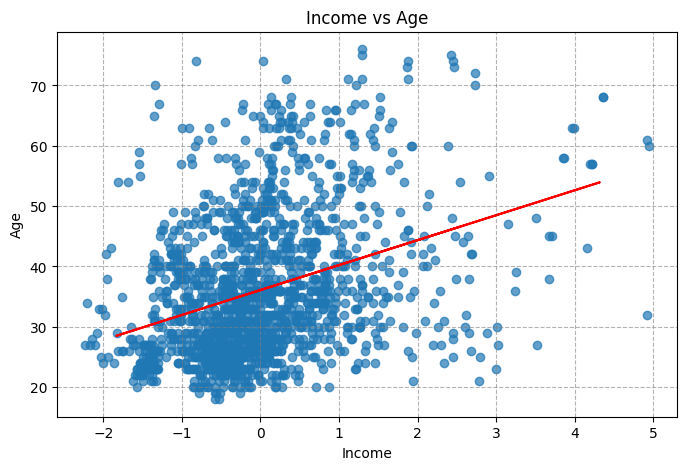

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train,  marker='o', alpha=0.7)
plt.plot(X_test, y_pred, color='red')
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title('Income vs Age')
plt.show() 

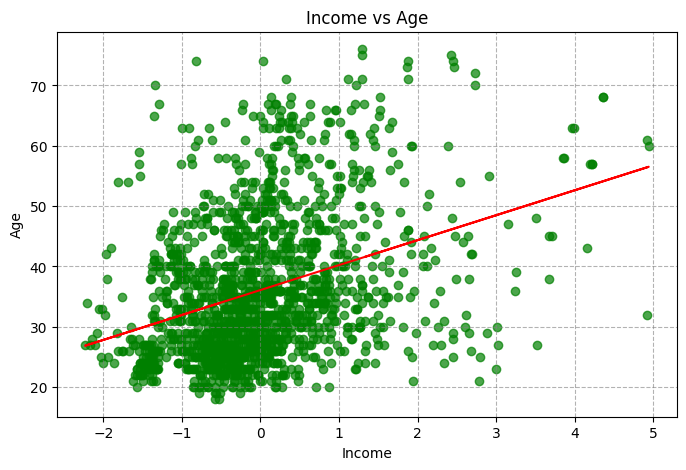

In [69]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='green', alpha=0.7)
plt.plot(X_train, y_pred_train, color='red')
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title('Income vs Age')
plt.show() 

### 8.2 r score

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [71]:
#calculating R sqaure
rsquare_test = r2_score(y_test, y_pred)
rsquare_train = r2_score(y_train, y_pred_train)

#calulating mse
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

#calulating rmse
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

#mean absolute error
mae_train = np.sqrt(mean_absolute_error(y_train, y_pred_train))
mae_test = np.sqrt(mean_absolute_error(y_test, y_pred))

In [72]:
print(f'R-squared (R2) for the test set: {rsquare_test}')
print(f'R-squared (R2) for the training set: {rsquare_train}')

R-squared (R2) for the test set: 0.10659389721219881
R-squared (R2) for the training set: 0.1171397571440872


In [73]:
print(f'Mean Sqaure Error (MSE) for the test set: {mse_test}')
print(f'Mean Sqaure Error (MSE) for the training set: {mse_train}')

Mean Sqaure Error (MSE) for the test set: 113.33562204684462
Mean Sqaure Error (MSE) for the training set: 123.42032913081604


In [74]:
print(f'Root Mean Sqaure Error (RMSE) for the test set: {rmse_test}')
print(f'Root Mean Sqaure Error (RMSE) for the training set: {rmse_train}')

Root Mean Sqaure Error (RMSE) for the test set: 10.64592044150456
Root Mean Sqaure Error (RMSE) for the training set: 11.109470245282447


In [75]:
print(f'Root Absolute Error (RMSE) for the test set: {mae_test}')
print(f'Root Absolute Error (RMSE) for the training set: {mae_train}')

Root Absolute Error (RMSE) for the test set: 2.9337431929273268
Root Absolute Error (RMSE) for the training set: 2.972905195842731


#### 8.3 Resiudal Analysis 

In [76]:
residuals_test = y_test - y_pred.flatten()
residuals_train = y_train - y_pred_train.flatten()

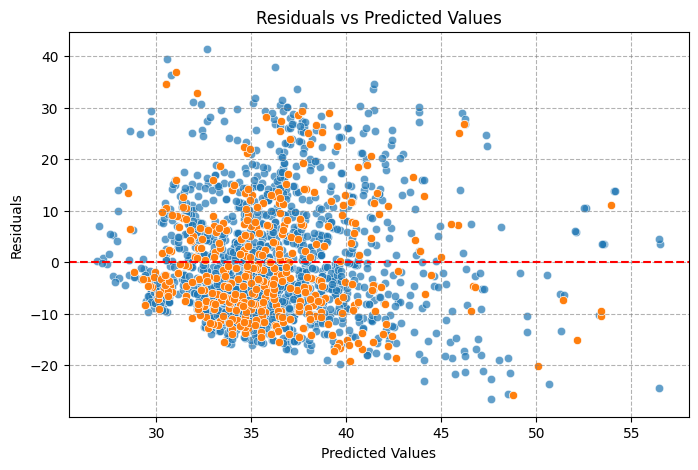

In [77]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_train.flatten(), y=residuals_train, alpha=0.7)
sns.scatterplot(x=y_pred.flatten(), y=residuals_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.show()


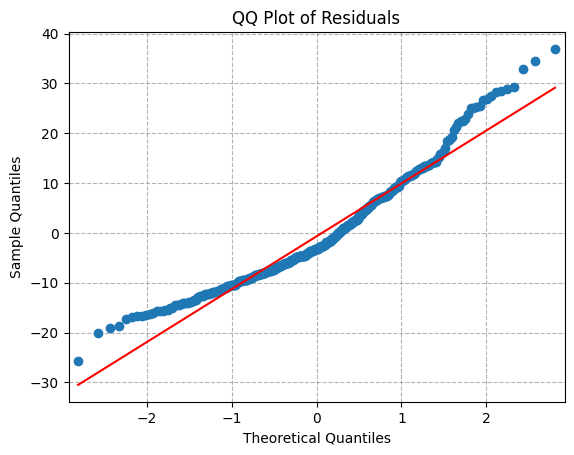

In [78]:
sm.qqplot(residuals_test, line='s')  
plt.title('QQ Plot of Residuals')
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.show()

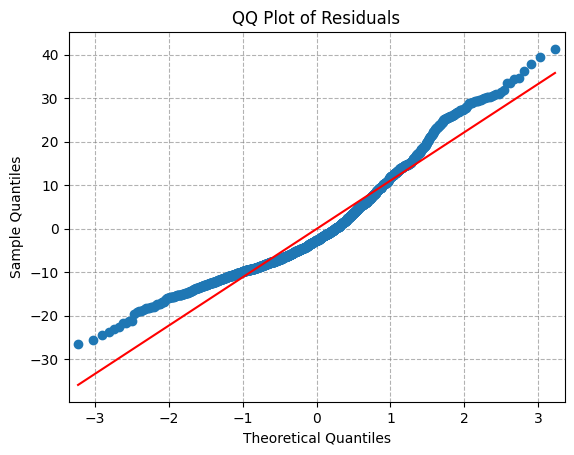

In [79]:
sm.qqplot(residuals_train, line='s')  
plt.title('QQ Plot of Residuals')
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.show()

In [80]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

In [81]:
residuals = y_test - y_pred.flatten()

In [82]:
# Add a constant term to the independent variables
X_test_with_constant = sm.add_constant(X_test)
# Perform the White test with the new X_test_with_constant
white_test_statistic, white_p_value, white_fstat, white_pval_fstat = het_white(residuals, X_test_with_constant)
print(f'White Test Statistic: {white_test_statistic}')
print(f'White Test p-value: {white_p_value}')

White Test Statistic: 12.688678487907312
White Test p-value: 0.0017566630850787495


#### 8.4 Heteroscedasticity Test

In [83]:
# Define a significance level (e.g., 0.05)
significance_level = 0.05

if white_p_value < significance_level:
    print("Heteroscedasticity Detected: The variance of residuals is not constant (heteroscedasticity).")
else:
    print("Homoscedasticity Detected: The variance of residuals is constant (homoscedasticity).")

Heteroscedasticity Detected: The variance of residuals is not constant (heteroscedasticity).


In [84]:
# Add a constant term to the independent variables
X_test_with_constant = sm.add_constant(X_test)
# Perform the Pagan test with the new X_test_with_constant
pagan_test_statistic, pagan_p_value, pagan_fstat, pagan_pval_fstat = het_breuschpagan(residuals, X_test_with_constant)
print(f'Pagan Test Statistic: {pagan_test_statistic}')
print(f'Pagan Test p-value: {pagan_p_value}')

Pagan Test Statistic: 12.443754253668882
Pagan Test p-value: 0.0004193919209908967


In [85]:
# Define a significance level (e.g., 0.05)
significance_level = 0.05

if pagan_p_value < significance_level:
    print("Heteroscedasticity Detected: The variance of residuals is not constant (heteroscedasticity).")
else:
    print("Homoscedasticity Detected: The variance of residuals is constant (homoscedasticity).")

Heteroscedasticity Detected: The variance of residuals is not constant (heteroscedasticity).


In [86]:
df[:5]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


### 9. Classification 

#### 9.1 Feature Engineering 

In [87]:
y = df['Occupation'].values

In [88]:
y[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [89]:
df[:5]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


In [90]:
X = df[['Sex', 'Marital status', 'Age','Income']].values
X[:5]

array([[     0,      0,     67, 124670],
       [     1,      1,     22, 150773],
       [     0,      0,     49,  89210],
       [     0,      0,     45, 171565],
       [     0,      0,     53, 149031]], dtype=int64)

In [91]:
X = (X - X.mean())/X.std()

In [92]:
X[:5]

array([[-0.54278982, -0.54278982, -0.54158753,  1.69438319],
       [-0.54277188, -0.54277188, -0.54239504,  2.16279521],
       [-0.54278982, -0.54278982, -0.54191053,  1.05806206],
       [-0.54278982, -0.54278982, -0.54198231,  2.53590262],
       [-0.54278982, -0.54278982, -0.54183875,  2.13153544]])

In [93]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 9.2 Model Selection 

In [94]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [95]:
models = {
    "Nearest Neighbors": KNeighborsClassifier(5),
    "Naive Bayes": GaussianNB(),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(kernel="rbf", gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
}

In [96]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

In [97]:
accuracy_scores = []

for i, j in models.items():
    # Train the model on the training data
    j.fit(X_train, y_train)
    #predictions on the test data
    y_pred = j.predict(X_test)
    #accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Store the accuracy score 
    accuracy_scores.append((i, accuracy))

In [98]:
Classification_result = pd.DataFrame(accuracy_scores, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

In [99]:
Classification_result

,Model,Accuracy
7,Gradient Boosting,0.8075
4,Decision Tree,0.7875
5,Random Forest,0.7800
6,AdaBoost,0.7800
8,Neural Net,0.7775
3,RBF SVM,0.7750
2,Linear SVM,0.7675
1,Naive Bayes,0.7525
0,Nearest Neighbors,0.7275


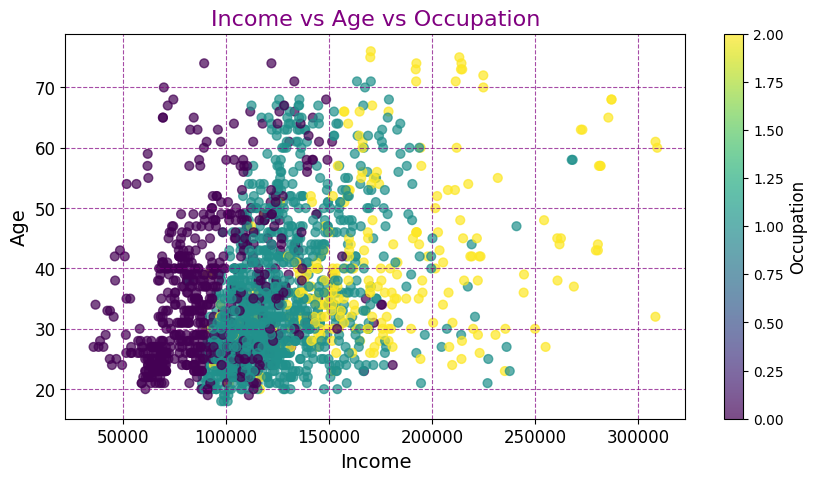

In [100]:
plt.figure(figsize=(10,5))
#selecting color columns
colors=df['Occupation']
#color of scatter
cmap = plt.get_cmap('viridis')
scatter = plt.scatter(df['Income'], 
                      df['Age'], c=colors, cmap=cmap, s=40, alpha=0.7)
#creating color bar according to age
cbar = plt.colorbar(scatter)
#labeling cbar 
cbar.set_label('Occupation', fontsize=12)
plt.title('Income vs Age vs Occupation', fontsize=16, color='purple')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.show()

#### 9.3 Model Accuracy comparision 

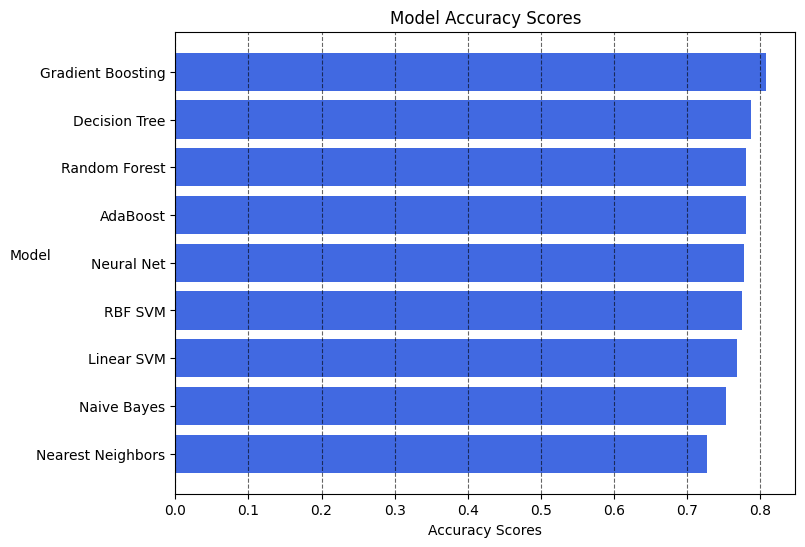

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))
x = Classification_result['Accuracy']
y = Classification_result['Model']
ax.barh(y, x, align='center', color='royalblue')
ax.invert_yaxis() 
ax.set_xlabel('Accuracy Scores')
ax.set_ylabel('Model', rotation=0)
ax.set_title('Model Accuracy Scores')
ax.xaxis.grid(True, linestyle='--', alpha=0.6, color='black')
plt.show()

#### 9.4 Best Model Selection 

In [102]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score 

In [103]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [104]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [105]:
X[:5]

array([[-0.54278982, -0.54278982, -0.54158753,  1.69438319],
       [-0.54277188, -0.54277188, -0.54239504,  2.16279521],
       [-0.54278982, -0.54278982, -0.54191053,  1.05806206],
       [-0.54278982, -0.54278982, -0.54198231,  2.53590262],
       [-0.54278982, -0.54278982, -0.54183875,  2.13153544]])

In [106]:
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)

In [107]:
print(result.importances_mean)

[0.01225    0.00116667 0.0725     0.33558333]


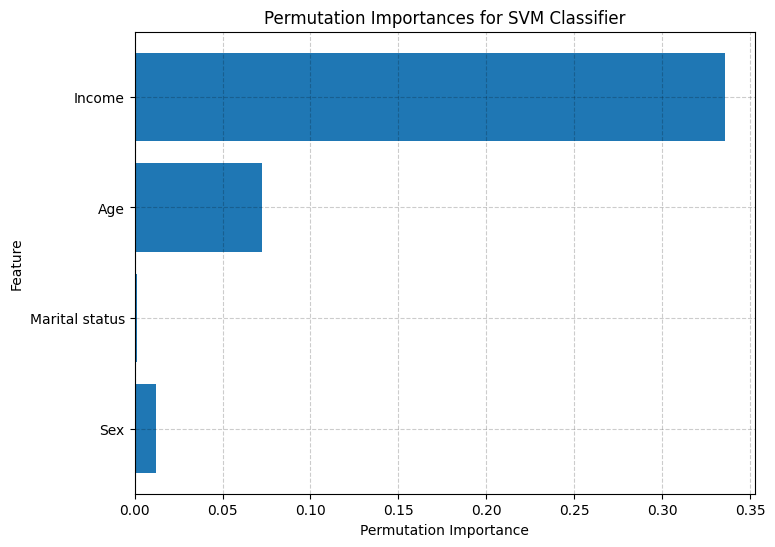

In [108]:
importances = result.importances_mean
feature_names = ['Sex', 'Marital status', 'Age','Income']  
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances for SVM Classifier')
plt.grid(True, linestyle='--', alpha=0.2, color='black')
plt.show()

#### Removing less valuable Features

In [109]:
#taget selection
y = df['Occupation'].values

In [110]:
#feature selection
X = df[['Age',  
        'Income']].values
X[:5]

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       [    45, 171565],
       [    53, 149031]], dtype=int64)

In [111]:
#feature scaling
X = (X - X.mean())/X.std()

In [112]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
#training model 
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [114]:
#prediction
y_pred = clf.predict(X_test)
#calcualting accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


#### 9.5 Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 93,  36,   2],
       [  4, 208,   7],
       [  1,  27,  22]], dtype=int64)

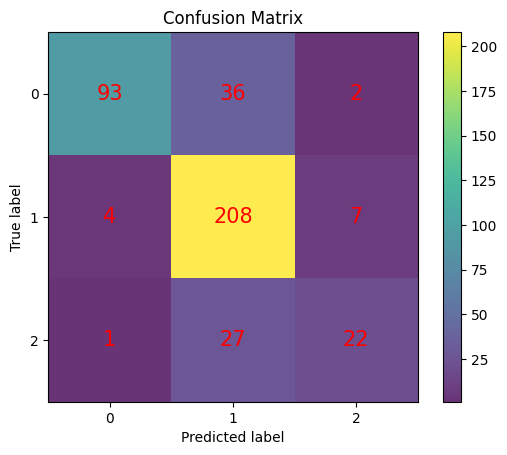

In [117]:
#confusion matrix
confusion = confusion_matrix(y_test, y_pred)

#confusion matrix
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('viridis'), alpha=0.8)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)  # Assuming you have three classes
plt.xticks(tick_marks, range(3))
plt.yticks(tick_marks, range(3))
plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(3):
    for j in range(3):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='red', fontsize=15)

plt.show()

In [118]:
#number of classes (assumed to be 3 in this example)
num_classes = len(confusion)

#variables for TN, FP, FN, TP
tn, fp, fn, tp = 0, 0, 0, 0

#TN, FP, FN, TP for each class
for i in range(num_classes):
    tn += confusion[i, i]
    fp += sum(confusion[:, i]) - confusion[i, i]
    fn += sum(confusion[i, :]) - confusion[i, i]
    tp += sum(sum(confusion)) - tn - fp - fn

#accuracy, precision, and recall
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

True Negatives: 323
False Positives: 77
False Negatives: 77
True Positives: 169
Accuracy: 0.76
Precision: 0.69
Recall: 0.69


In [119]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate accuracy, precision, and recall
accuracy = np.trace(confusion) / np.sum(confusion)
precision = np.diag(confusion) / np.sum(confusion, axis=0)
recall = np.diag(confusion) / np.sum(confusion, axis=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.81
Precision: [0.94897959 0.76752768 0.70967742]
Recall: [0.70992366 0.94977169 0.44      ]


#### 9.6 ROC Curve 

In [120]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [121]:
#Binarize the output classes if you have more than two classes
y_bin = label_binarize(y_test, classes=[*range(num_classes)])  # Replace num_classes with the number of classes
n_classes = y_bin.shape[1]

#predict each class against the other using OneVsRest strategy
clf_ovr = OneVsRestClassifier(clf)
y_score = clf_ovr.fit(X_train, y_train).predict_proba(X_test)

#compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

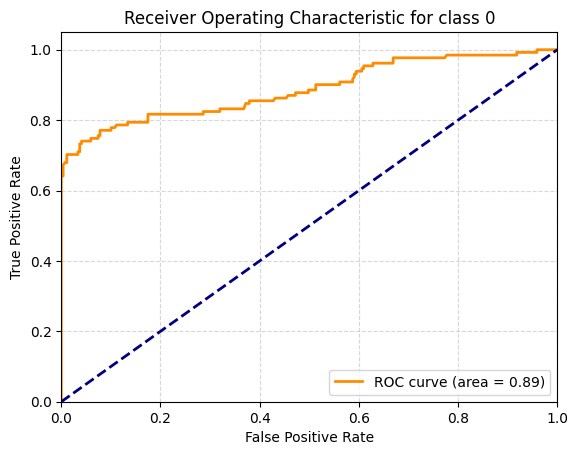

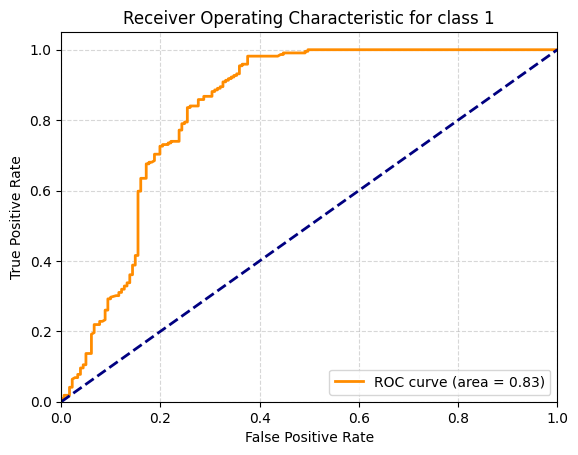

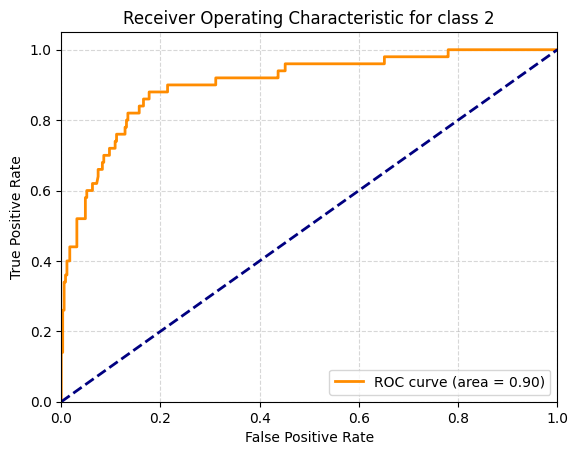

In [122]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for class {i}')
    plt.legend(loc="lower right")
    plt.grid(True, ls='--', alpha=0.5)
    plt.show()

#### References:

[Customer Segmentation Tutorial in Python](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

[K-means Clustering on Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

[sklearn.cluster.KMeans Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[K-means Clustering Article on Neptune.ai](https://neptune.ai/blog/k-means-clustering)